# UC San Diego: Neural Data Science
## Pediatric Epileptic Seizure Detection with EEG via Dimensionality Reduction and Tree Classifiers

# Names
- Charlotte Dong 
- Kabir Vats 
- Nihal Nazeem 

# Overview

To reach our goal of accurate classification and categorical predictions of seizure from EEG data, our group implemented a pipeline that processed input data through various dimensionality reduction and analysis algorithms to predict whether or not EEG data was from an epileptic seizure, after understanding the data with some visualizations about spiking characteristics and data distributions. We separated data from the dataset into training and testing data, and trained each component of the pipeline on this data to test its accuracy with testing data. The pipeline consisted of K-Nearest-Neighbors to group initial predictions for seizures (two features), then used TruncatedSVD for further accuracy and identification of 14 features from the processed KNN data. Afterwards, we used Random Forest and Decision Tree (in parallel) to predict seizures from the 14 TruncatedSVD features and compared the accuracy of the two machine learning models. Following this, we did an ablation study of each individual component to understand its role and impact within prediction by breaking up the KNN-to-TruncatedSVD feature preprocessing into either KNN or TruncatedSVD feature pre-processing and then applying the Tree Models (Decision Tree and Random Forest) to perform classification. We then performed an extra study on the effectiveness of t-SNE on the classification accuracy when using it to do feature-preprocessing and discussed the various pipelines and their effectiveness in making categorical predictions on Seizure vs. Non-Seizure EEG data.

<a id='research_question'></a>

# Research Question



How does the temporal pattern of neural activity in EEG data of pediatric epilepsy and non-epileptic patients differ, and how can these changes be categorized, especially using Tree-based classifiers with different dimensionality reduction methods, to determine accurate seizure detection and prediction algorithms for embedded medical devices?

<a id='background'></a>

## Background & Prior Work

Due to personal experiences within the group of witnessing seizures of friends and loved ones, there is a need to further explore the nature of seizures. By analyzing factors that characterize seizures and studying prediction models for seizures we may then contribute to the creation of accurate biomedical embedded devices that have impact. We can learn more about this severe and chronic disorder by studying neuroscientific seizure detection and prediction data. Epilepsy affects around “50 million people, with 100 million being affected once in their lifetime” (Huang, 2020). Hence, the detection, prediction, and forecasting of seizures can potentially improve these people's quality of life.

By studying the seizure detection and prediction problem with EEG (Electroencephalogram) data, we can utilize their ubiquity to understand how medical and computing infrastructure use these signals in medical devices to provide care, and how we can ensure efficient approaches for these real-time monitoring decisions (Shoka et al., 2023). The challenges of tackling these recordings in their dynamic, noisy, and high-volume nature while studying this anomalous behavior can help us explore the accuracy of probabilistic models against binary decisions for predicting seizures (Costa et al., 2024). To study this problem of creating accurate categorial prediction models, we apply the approach from Harikumar, R., & Vijayakumar, T. (2013) and Alalayah et al. (2023) to a new dataset of pediatric epilepsy patients by using Decision Tree classification, with SVD and K-Means clustering and dimensionality reduction.


References (include links):
1. Alalayah, K. M., Senan, E. M., Atlam,, H. F., Ahmed, I. A., & Shatnawi, H. S. A. (2023, June 3). Effective Early Detection of Epileptic Seizures through EEG Signals Using Classification Algorithms Based on t-Distributed Stochastic Neighbor Embedding and K-Means. PubMed Central. Retrieved 1 June, 2024, from https://www.ncbi.nlm.nih.gov/pmc/articles/PMC10252693/
1. Costa, G., Teixeira, C., Pinto, M. F., & Nature. (2024, March 7). Comparison between epileptic seizure prediction and forecasting based on machine learning. Scientific Reports. Retrieved May 6, 2024, from https://www.nature.com/articles/s41598-024-56019-z
1. Grinsztajn, L., Oyallon, E., & Varoquaux, G. (2022, July 18). [2207.08815] Why do tree-based models still outperform deep learning on tabular data? arXiv. Retrieved May 6, 2024, from https://arxiv.org/abs/2207.08815
1. Harikumar, R., & Vijayakumar, T. (2013, April 1). Comprehensive Analysis of Hierarchical Aggregation Functions Decision Trees, SVD, K-means Clustering, PCA and Rule Based AI Optimization in the Classification of Fuzzy based Epilepsy Risk Levels from EEG Signals. https://cspub-ijcisim.org/index.php/ijcisim/article/view/221. Retrieved 6 1, 2024, from https://cspub-ijcisim.org/index.php/ijcisim/article/view/221
1. Huang, X. (2020, May 25). A review of epileptic seizure detection using machine learning classifiers - Brain Informatics. Brain Informatics. Retrieved May 6, 2024, from https://braininformatics.springeropen.com/articles/10.1186/s40708-020-00105-1
1. Shoka, A. A. E., Dessouky, M. M., El-Sayed, E. A., Hemdan, E. E.-D., & Springer Link. (2023, April 4). EEG seizure detection: concepts, techniques, challenges, and future trends. EEG seizure detection: concepts, techniques, challenges, and future trends. Retrieved May 5, 2024, from https://link.springer.com/article/10.1007/s11042-023-15052-2


# Hypothesis


We predict that data processed with TruncatedSVD fed into Random Forest will perform better  in terms of model accuracy than either applying a single dimensionality reduction or a clustering technique (K-Nearest Neighbors, TruncatedSVD, t-SNE) followed by a tree classifier (DecisionTree or Random Forest) or applying a KNN and then TruncatedSVD to the Tree Classifiers. This is because Random Forest has more regularization and uses a sub-sampled bootstrapped ensemble model for finding the decision while being more expressive in carving the decision boundary than a single Decision Tree, and TruncatedSVD can help reorganize the data with a maximum distance between data points that aren’t necessarily dense or Gaussian. We also expect the spiking density of the Seizure class to be higher than the non-Seizure class, as seizures are known to cause involuntary neuron activation that can trigger other neurons.


# Dataset(s)

- Dataset Name: CHB-MIT Scalp EEG Database (as processed by the UCI Machine Learning Repository)
- Link to the dataset: https://www.kaggle.com/datasets/harunshimanto/epileptic-seizure-recognition
- Number of observations: 11500 observations

This dataset looks at the recorded EEG brain activities of 500 participants of the study who are rated 1 through 5 with the various categories where 1 means seizure and the remaining numbers mean there was no epileptic seizure.


# Data Wrangling

The data was taken from the UC Irvine Machine Learning repository and is a “pre\-processed and re\-structured/reshaped version of a very commonly used dataset featuring epileptic seizure detection” \(From the Kaggle\). To wrangle this data, we uploaded the CSV to our repository and created a Pandas DataFrame for the rest of our code to use.

The EEG data consisted of five classes each with EEG recordings from 100 patients. The classes consisted of epileptic seizure data, adjacent to tumor data, non\-adjacent to tumor data, eyes\-open data and eyes\-closed data \(labeled 1\-5 respectively\). The data had been recorded over 23 seconds and there were 178 features recorded per second. The resulting data plot was **\(5 classes \* 100 patients \* 23 seconds\)\(1 index \+ 178 samples per second \+ 1 target class\) = 11500 x 180**. 



In [35]:
## YOUR CODE HERE
!pip3 install numpy;
!pip3 install pandas;
!pip3 install scikit-learn;
!pip3 install seaborn --upgrade;

import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from numpy.linalg import norm, svd;
from sklearn import preprocessing;
from sklearn.neighbors import KNeighborsClassifier;
from sklearn.neighbors import KNeighborsTransformer;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.model_selection import train_test_split;
from sklearn.model_selection import GridSearchCV;
from sklearn.pipeline import Pipeline;
from sklearn.decomposition import TruncatedSVD;
from mpl_toolkits.mplot3d import Axes3D;
from sklearn.cluster import KMeans;
from sklearn.metrics import confusion_matrix, accuracy_score;
from sklearn.neighbors import KNeighborsTransformer;
from scipy.spatial import distance;
from sklearn.tree import DecisionTreeClassifier, plot_tree;
from sklearn.model_selection import train_test_split;
from sklearn import svm;


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [36]:
data = pd.read_csv('data.csv', index_col=0)
#print(data)
df = pd.DataFrame(data)
df.index.name='ID'
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
ID,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,15,16,12,5,-1,-18,-37,-47,-48,2
X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,...,-65,-33,-7,14,27,48,77,117,170,1
X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5


# Data Cleaning

The data was separated by class and a stratified random sample was taken to separate into 80% training and 20% testing data. 

The data lacked a balance between epileptic seizure and non\-epileptic seizure data, due to only one of the five classes consisting of seizure data. The seizure data was thus oversampled in both the training and testing category to yield 50% class 1 data and 50% non class 1 data, resulting in training dataset that was now 14720x180 and a testing dataset that was 3680x180.

To make predictions between seizure and non\-seizure data, we reclassified the data from the five classes into binary classes representing seizure \(1\) and non\-seizure\(0\) data. This was the data used for our data analysis.


In [37]:
# Binary between y=0/1
features = [y for x, y in df.groupby('y')]

# Create arrays for testing / training data
train = [None]*5
test = [None]*5

# Use library method to split each feature
for i in range(len(features)):
    train[i],test[i] = train_test_split(features[i], test_size=0.2, random_state = 0)

# Concatenate training / testing arrays, multiplying the 'y'=1 by 4 because we want to equalize seizure / non-seizure

trainingDF = pd.concat((train[0],train[0],train[0],train[0],train[1],train[2],train[3],train[4]))

testingDF = pd.concat((test[0],test[0],test[0],test[0],test[1],test[2],test[3],test[4]))

# We now set all non-seizure to 0 to create binary classes to group by
trainingDF.loc[trainingDF.y !=1, 'y'] = 0
testingDF.loc[testingDF.y != 1, 'y'] = 0

# Sort values
trainingDF.sort_values(['y','ID'], inplace=True)
testingDF.sort_values(['y','ID'], inplace=True)

# Create training / testing inputs / outputs
X_train = np.array(trainingDF.drop(columns=['y']))
y_train = np.array(trainingDF.y)

X_test = np.array(testingDF.drop(columns=['y']))
y_test = np.array(testingDF.y)

# Data Visualization

## Pair Plot and Number of Samples By Class Plot

We first chose to use a pair plot to visualize the data, and graphed the number of samples for each class as a bar graph under to give additional context.

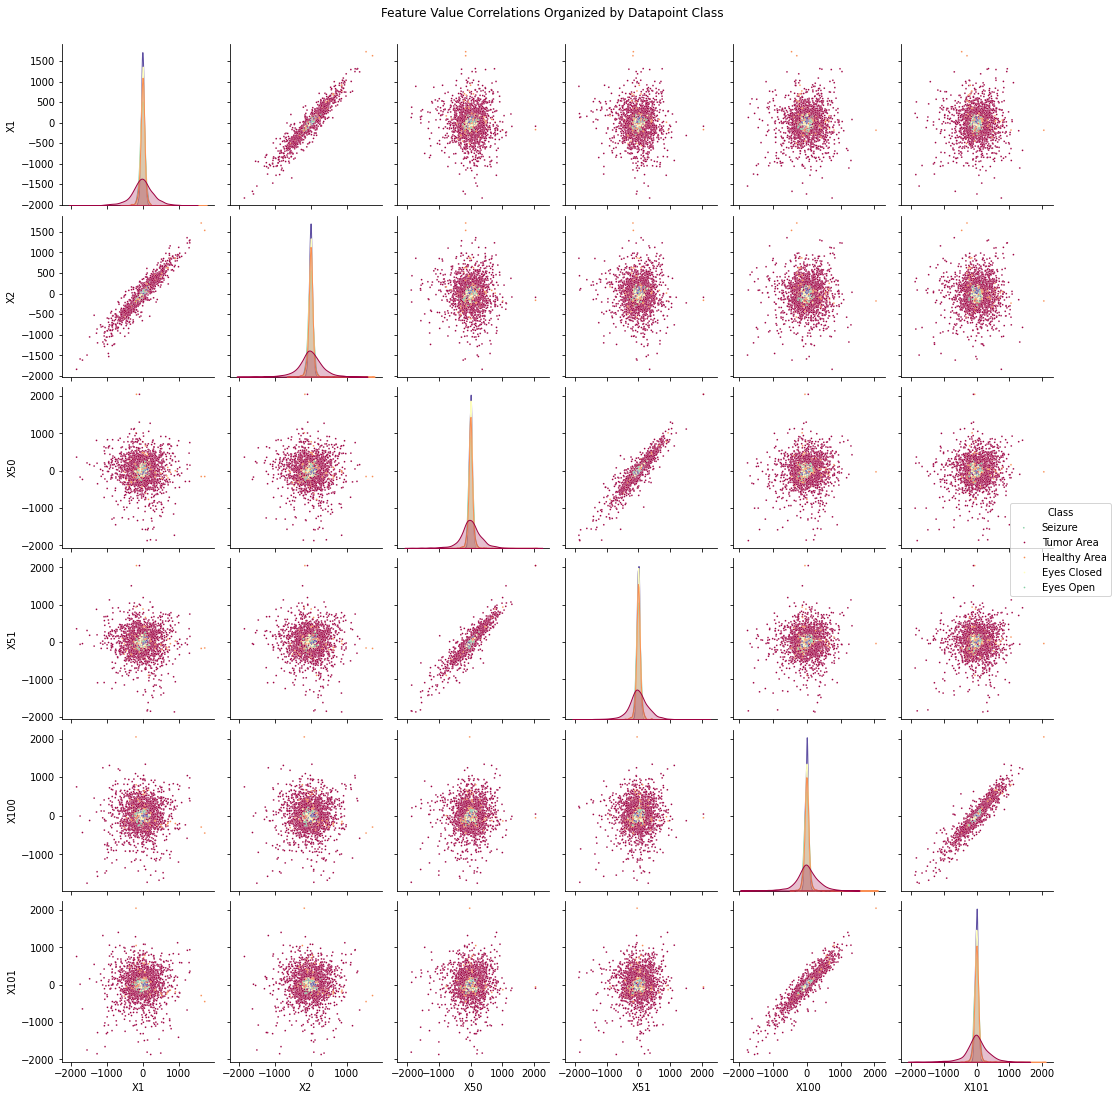

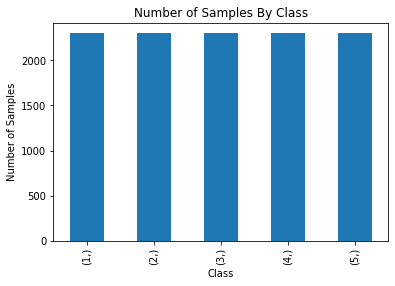

In [38]:
import seaborn as sns


pairPlot = sns.pairplot(df, vars=['X1', 'X2', 'X50','X51','X100','X101'], hue='y', palette='Spectral', plot_kws=dict(s=3))
pairPlot.fig.suptitle('Feature Value Correlations Organized by Datapoint Class', y=1.02)
pairPlot.fig.legend(title='Class',labels=['Seizure','Tumor Area','Healthy Area','Eyes Closed','Eyes Open'], loc='right')
pairPlot._legend.remove()

counts = df.value_counts('y')
classCountPlot = counts.to_frame().sort_values('y').plot.bar()
classCountPlot.set_xlabel('Class')
classCountPlot.set_ylabel('Number of Samples')
classCountPlot.set_title('Number of Samples By Class');
classCountPlot.legend().remove()

The pair plot serves multiple functions as a data visualization:
- The first function is to qualify the claim that dimension reduction is possible by revealing some easily visible correlations between adjacent features. The scatter plots between features with adjacent indexes show strong correlations, revealing that the 178-dimensional data can easily have its dimensions reduced. This correlataion might be due to the temporal locality of adjacent features' EEG recordings.
- The second function of this pair plot is to visually reveal distinctions between seizure-positive data and seizure-negative data. For our seizure positive class we can see much higher variance across all features in both the correlation plots and the distribution plots; we also take note of the non-Gaussian form of these distributions. This indicates potential to classify the class by examining feature data.

This bar graph visualizes the data set's classes:

- This bar graph shows the distribution of the data by class and helps to qualify the pair plot (and all other plots) by showing that the sample size for each class is the same, but the seizure class shows very definitively different data.


## Feature Means and Standard Deviations

The following line plots graph the mean and standard deviations respectively for each of the 178 features with one line for each class of data.

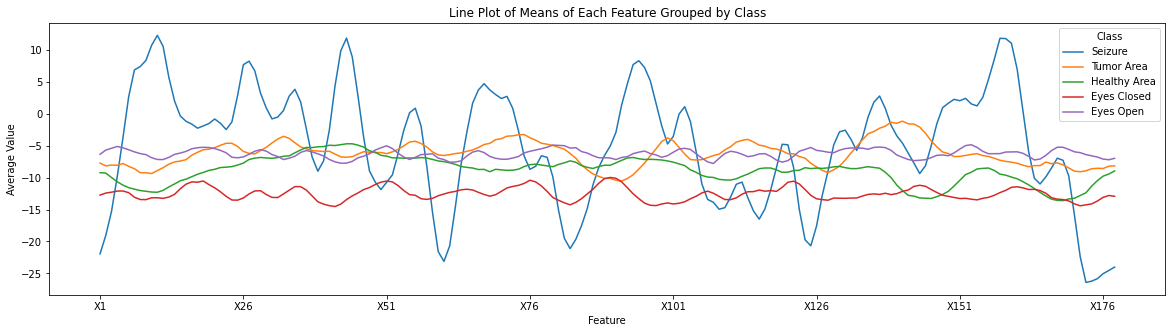

In [39]:
meanlineplt,ax = plt.subplots(figsize=(20,5))


meanlineplt = df.groupby('y').mean().transpose().plot(ax=ax)
meanlineplt.set_title('Line Plot of Means of Each Feature Grouped by Class');
meanlineplt.set_xlabel('Feature');
meanlineplt.set_ylabel('Average Value');
meanlineplt.legend(title='Class',labels=['Seizure','Tumor Area','Healthy Area','Eyes Closed','Eyes Open']);

Each line in this line plot reveals the mean across each of 2300 data points for each feature (with one line for each class). The seizure class has a higher variation between each feature means, revealing yet another distinction between this class and the rest of the data. If dimensionality reductions can track this variance in means they will be very useful in classifying the seizure data.

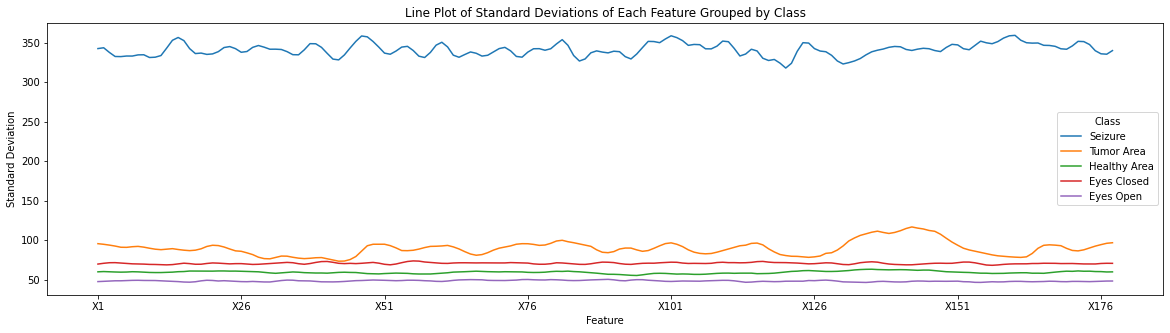

In [40]:
stdlineplt,ax = plt.subplots(figsize=(20,5))

stdlineplt = df.groupby('y').std().transpose().plot(ax=ax)
stdlineplt.set_title('Line Plot of Standard Deviations of Each Feature Grouped by Class');
stdlineplt.set_xlabel('Feature');
stdlineplt.set_ylabel('Standard Deviation');
stdlineplt.legend(title='Class',labels=['Seizure','Tumor Area','Healthy Area','Eyes Closed','Eyes Open']);

The graph illustrates that the seizure class has much higher standard deviations for each feature compared to the non-seizure classes. This demonstrates that seizure data varies from all other classes significantly as a whole. Our goal will be to isolate the differences and use them to classify the seizure data.

## Box Plot For Each Class’s Data Points Across All Features

This box plot helps to understand the overall distribution of data across all features for each class.

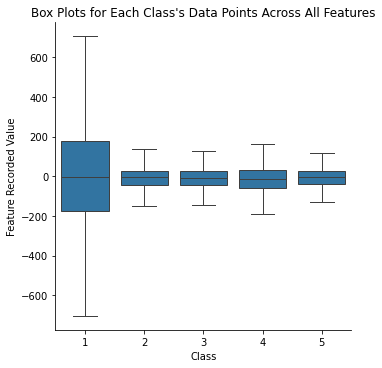

In [41]:
# Group by folder
features = [y for x, y in df.groupby('y')]
melted = pd.melt(df, id_vars='y', value_vars={f'X{i}' for i in range(1, 179)}, var_name='X_cols', value_name='X')

# Create a box plot
allFeaturesBarPlot = sns.catplot(kind='box', data=melted, x='y', y='X',showfliers=False)

plt.title("Box Plots for Each Class's Data Points Across All Features")
plt.xlabel('Class')
plt.ylabel('Feature Recorded Value')
# Display the plot
plt.show()


This box plot is another visualization of seizure class (class 1) data in comparison to other class's data, aggregated across all features. As we can see, simply aggregating the data would not isolate seizure data because all data is centered around zero, so data analysis techniques must take into account variance and use the features from one point in order to classify.

## Histogram of Feature Values

To decide which models to use, we made a histogram to understand the overall distribution of all features across all classes.

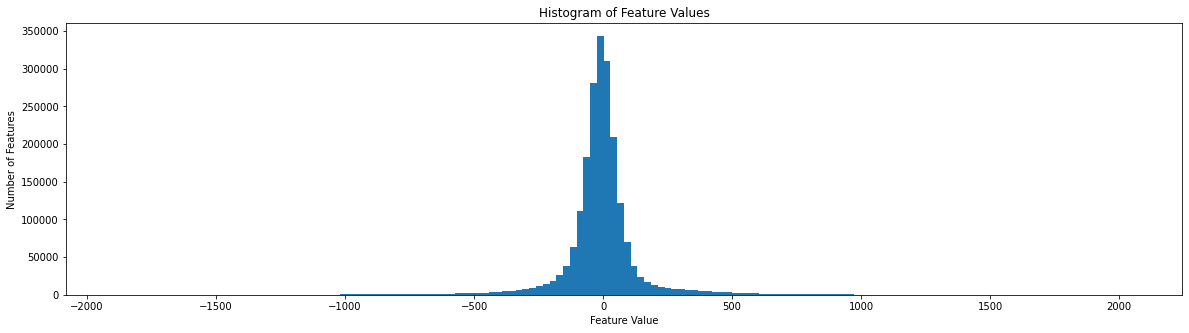

In [42]:
features = df[[f'X{i}' for i in range(1,179)]]
ftList = df.values.reshape(-1,).tolist()
featureHistogram,ax = plt.subplots(figsize=(20,5))

featureHistogram = plt.hist(ftList, bins=150)
plt.title('Histogram of Feature Values')
plt.xlabel('Feature Value')
plt.ylabel('Number of Features');

This is a histogram of all of our feature values across all data points. This histogram justifies use of TruncatedSVD, showing that most of the data is near 0. We also see that our feature data is not gaussian. The peak is very high and the tails are very thin, showing a non-gaussian distribution for sparse feature values.

## Spike Train Raster Plot (over Time)

We wanted to make a spike train raster plot to visualize data using more neuroscientific EDA techniques.

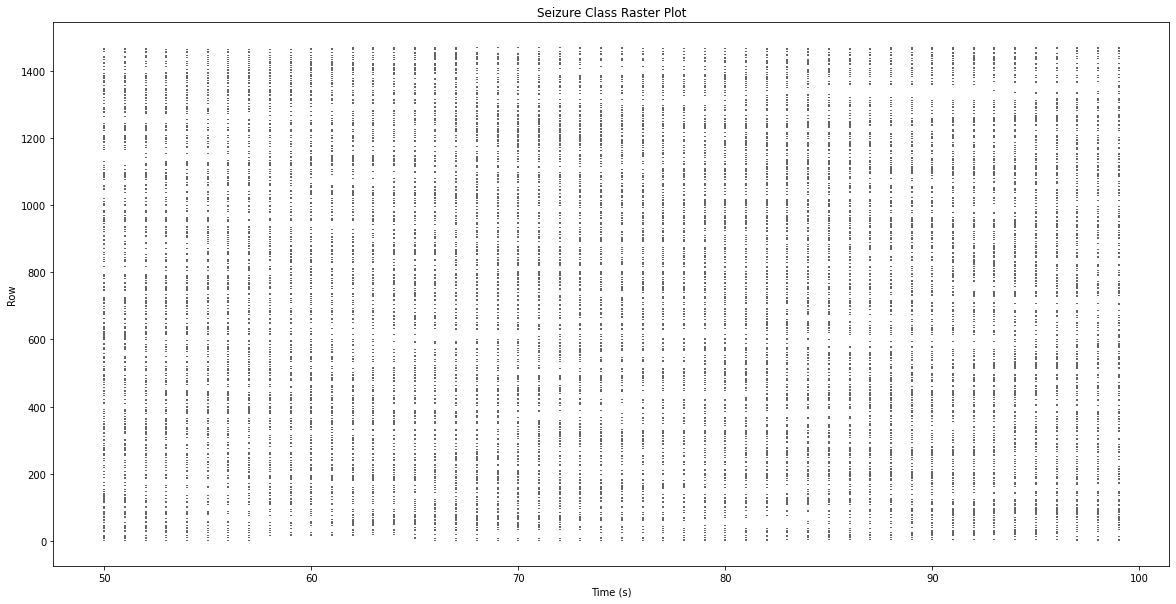

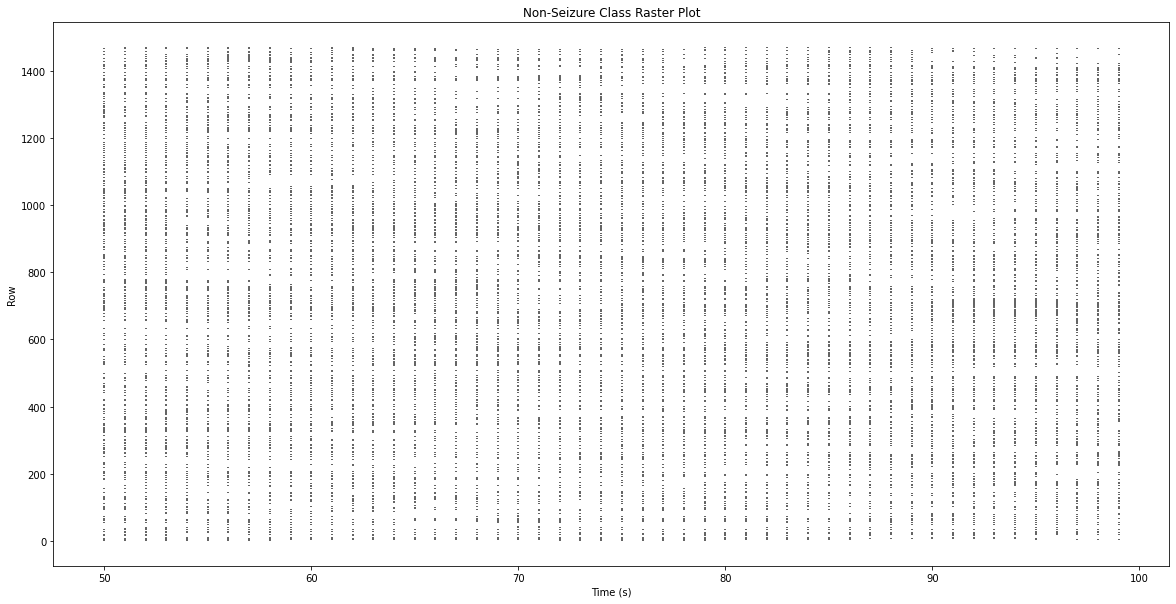

In [43]:
def simulate_spike_trains(X, threshold=0):
    spike_trains = []
    for i in range(X.shape[0]):
        spikes = np.where(X[i, :] > threshold)[0]
        spike_trains.append(spikes)
    return np.array(spike_trains, dtype=object)

def restrict_spike_times(spike_times, interval):
    interval_spike_times = []
    for spikes in spike_times:
        interval_mask = (spikes >= interval[0]) & (spikes < interval[1])
        interval_spike_times.append(spikes[interval_mask])
    return np.array(interval_spike_times, dtype=object)

def create_raster_plot(spike_trains, neuron_idx, title):
    plt.figure(figsize=(20, 10))
    plt.eventplot([spike_trains[i] for i in neuron_idx], color=".2")
    plt.xlabel("Time (s)")
    plt.ylabel('Row')
    plt.title(title)
    plt.show()

X_train_spikes = simulate_spike_trains(X_train, threshold=0)


interval = (50,100)#(5, 178-5+1)
restricted_spike_times_train = restrict_spike_times(X_train_spikes, interval)

seizure_spike_trains = restricted_spike_times_train[y_train == 1]
non_seizure_spike_trains = restricted_spike_times_train[y_train == 0]

neuron_idx_seizure = np.arange(0, len(seizure_spike_trains), 5)
neuron_idx_non_seizure = np.arange(0, len(non_seizure_spike_trains), 5)

create_raster_plot(seizure_spike_trains, neuron_idx_seizure, 'Seizure Class Raster Plot')
create_raster_plot(non_seizure_spike_trains, neuron_idx_non_seizure, 'Non-Seizure Class Raster Plot')

We notice more thickness in the tick marks of the Seizure Class Raster plot compared to the Non-Seizure Class Raster Plot. This implies there could be more spiking activity for the Seizure class during this duration, which is consistent with our expectation of uncontrolled firing of neurons during a Seizure. However, this raster plot is very difficult to interpret and is not a very good visual representation of the data in its current state, likely due to using uninterpretable features.

## Inter-Spike Interval (ISI) Histogram (Seizure vs non-Seizure)

Spike Density (Seizure): 1794.4242424242425
Spike Density (Non-Seizure): 1628.1313131313132


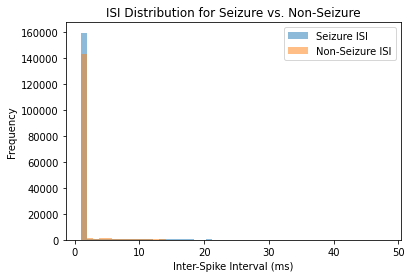

In [44]:
def calculate_spike_density(spike_trains):
    total_spikes = sum(len(spikes) for spikes in spike_trains)
    total_time = max(max(spikes) for spikes in spike_trains if len(spikes) > 0)
    return total_spikes / total_time

seizure_density = calculate_spike_density(seizure_spike_trains)
non_seizure_density = calculate_spike_density(non_seizure_spike_trains)

print(f"Spike Density (Seizure): {seizure_density}")
print(f"Spike Density (Non-Seizure): {non_seizure_density}")

def calculate_isi_distribution(spike_trains):
    all_isis = []
    for spikes in spike_trains:
        isis = np.diff(spikes)
        all_isis.extend(isis)
    return np.array(all_isis)

seizure_isis = calculate_isi_distribution(seizure_spike_trains)
non_seizure_isis = calculate_isi_distribution(non_seizure_spike_trains)

plt.hist(seizure_isis, bins=50, alpha=0.5, label='Seizure ISI')
plt.hist(non_seizure_isis, bins=50, alpha=0.5, label='Non-Seizure ISI')
plt.xlabel('Inter-Spike Interval (ms)')
plt.ylabel('Frequency')
plt.legend()
plt.title('ISI Distribution for Seizure vs. Non-Seizure')
plt.show()

This histogram shows the distribution of the inter-spike interval (ISI)  across the Seizure and Non-Seizure classes. We notice that the distribution for both is aggressively right-skewed, meaning the inter-spike interval is mostly short (< 3 ms), but the Seizure class has a higher frequency of these low-frequency ISI in the first bin, which is consistent with the understanding of uncontrolled neuron firing during a seizure that can affect nearby neurons also to spike. This is also supported by the higher Seizure Spike Density than the Non-Seizure Spike Density (amount of spikes over time). We also notice that around 15ms onward, there are some Seuzire ISIs, likely due to more cells being fired and requiring the refractory period for possibly more firing activity, compared to Non-Sezure ISI, mainly occurring < 13ms. 

# Data Analysis & Results

### **KNN → TruncatedSVD → Tree Models [Decision Tree, Random Forest]**
We followed a similar pipeline as stated in the paper, first running KNNTransformer, followed by TruncatedSVD, then either Decision Tree or Random Forest at the end.


![](https://cdn.discordapp.com/attachments/1224453640417312899/1248459816553156658/Screenshot_2024-06-06_at_19.13.29.png?ex=6664670f&is=6663158f&hm=1ec760ad146147b803d06e43039294000194b693bc36b26792bcb4ef1a67090c&)


## K-Nearest Neighbors on Raw Data 

To follow the paper, we first trained the K-Nearest Neighbors (KNN) transformer algorithm on the raw data. We also tested the classification abilities of KNN in isolation to better understand each component of the pipeline

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4b63b45ca0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


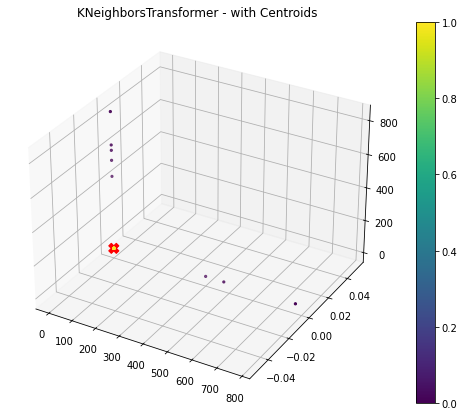

Number of centroids: 2
Centroid 1 Coord: [0. 0. 0. ... 0. 0. 0.]
Centroid 2 Coord: [0.1121913  0.         0.2073638  ... 2.72587858 0.82170996 2.62808926]
Centroid 1 Shape: (14720,)
Centroid 2 Shape: (14720,)


In [45]:
# KNN training (knn_transformer)
knn_transformer = KNeighborsTransformer(n_neighbors=5)
X_train_knn = knn_transformer.fit_transform(X_train, y_train).toarray() 
X_test_knn = knn_transformer.transform(X_test).toarray()

# K-Means clustering to find centroids
kmeans = KMeans(n_clusters=len(np.unique(y_train)), random_state=42)
kmeans.fit(X_train_knn)
centroids = kmeans.cluster_centers_


# Visualize KNN transformer with centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_train_knn[:, 0], X_train_knn[:, 1], X_train_knn[:, 2], c=y_train, cmap='viridis', s=5)
centroid_sc = ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=100)

plt.title('KNeighborsTransformer - with Centroids')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
plt.colorbar(sc)
plt.show()


# print number of centroids
num_centroids = len(centroids)
print(f'Number of centroids: {num_centroids}')

# print centroids
centroid_1 = centroids[0]
centroid_1_shape = centroid_1.shape
centroid_2 = centroids[1]
centroid_2_shape = centroid_2.shape
print(f'Centroid 1 Coord: {centroid_1}')
print(f'Centroid 2 Coord: {centroid_2}')
print(f'Centroid 1 Shape: {centroid_1_shape}')
print(f'Centroid 2 Shape: {centroid_2_shape}')

We trained the K-Nearest Neighbors transformer with 5 neighbors, and transformed the training and testing dataset. To visualize the trained data, we applied a 3D scatter plot along with K-Means clustering to visualize the transformed data and the centroids. From the graphs, there seems to be only 2 centroids with each centroid having coordinates of very high dimensions, and the clusters seem to be overlapping at close to zero on both the x-axis and the z-axis. 

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4b638bff70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


KNN Testing Accuracy: 0.8434782608695652


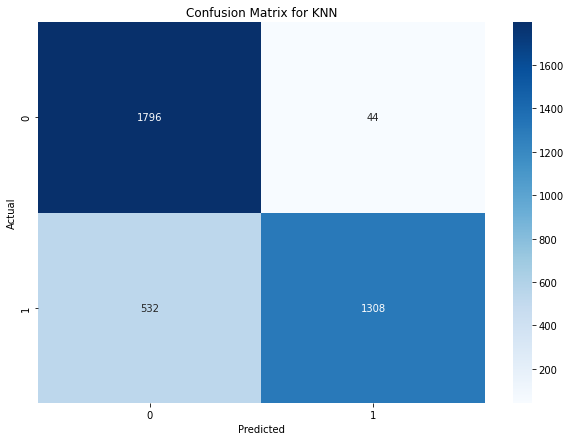

In [46]:
# KNN training (knn_classifier) and confusion matrix visualization

# train KNN classifier on transformed data
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_knn, y_train)
y_pred_knn = knn_classifier.predict(X_test_knn)

# calculate KNN accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Testing Accuracy: {knn_accuracy}")

# calculate confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In order to further investigate our training result, we visualized the data by printing out the accuracy and its confusion matrix. It turns out that our KNN accuracy was 84.3% and the confusion matrix shows that our KNN was able to identify 1796 True Negatives and 1308 True Positives, compared to much lower rates in False Positive (44) and False Negative  (532). 

## TruncatedSVD on K-Nearest Neighbors Outputted Data

Following the paper, the next step in this first pipeline was PCA, which we substituted with TruncatedSVD due to similar qualities. TruncatedSVD would take in the KNN output (adjacency matrix) and create 14 features to train our tree models on.

/tmp/ipykernel_116/2765496553.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('coolwarm', 10))


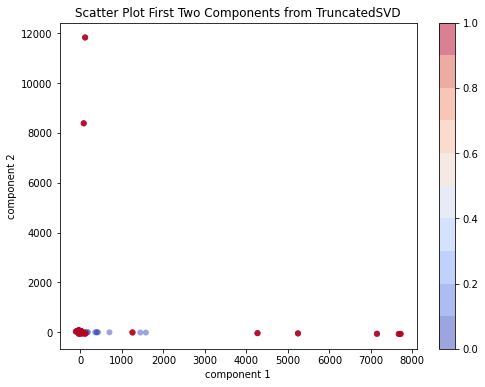

In [47]:
# Fit and transform your data using truncatedSVD
# knn = KNeighborsTransformer(n_neighbors = knn_neighbors)
num_truncatedSVD_comps = 14
truncatedSVD = TruncatedSVD(n_components=num_truncatedSVD_comps, tol=0.01, random_state = 0)
X_train_truncatedSVD = truncatedSVD.fit_transform(X_train_knn)#X_train)
X_test_truncatedSVD = truncatedSVD.transform(X_test_knn)

# Plot the first two truncatedSVD components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_truncatedSVD[:, 0], X_train_truncatedSVD[:, 1], c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('coolwarm', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Scatter Plot First Two Components from TruncatedSVD')
plt.colorbar()

After transforming the data using KNN, we applied TruncatedSVD to transform and reduce the data to 14 dimensions. We visualize the 14-dimensional space in a 2-D subspace to get a shadow of how the data were clustered in the high-dimensional space. From this plot, the first two major dimensions don't seem to give a clear interpretation of the data clustering.

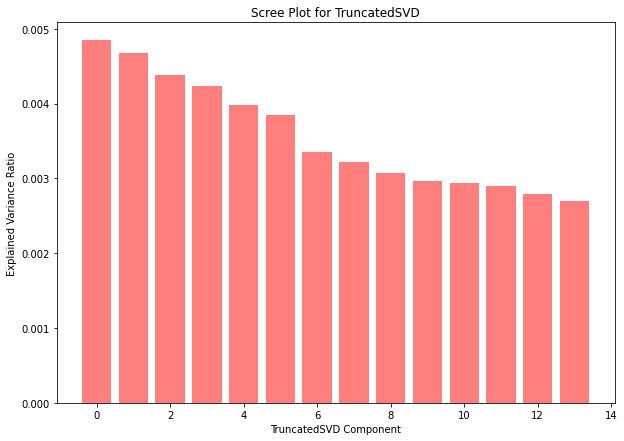

In [48]:
#Plot scree plot
indices = np.arange(len(truncatedSVD.explained_variance_ratio_))

plt.figure(figsize=(10, 7))
plt.bar(indices, truncatedSVD.explained_variance_ratio_, color='r', alpha=0.5)

plt.xlabel('TruncatedSVD Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for TruncatedSVD')

plt.show()

Since we see that the first two major dimensions don’t provide a clear low-dimensional interpretation of the data clustering, we perform a scree plot analysis to understand how much of each new reduced-dimension captures the data distribution in 14-dimensional space. In the original paper, they used Principal Component Analysis, but since there is a relation between PCA and SVD, we can use the squared singular values to find the ratio of variance explained by each TruncatedSVD dimension. We also notice that the first Principal Component explains 0.5% of the variance in the data. After applying a k-Nearest-Neighbor transformation ot the data, it is evident that the high-dimensional data distribution was not successfully captured by TruncatedSVD as there was no “elbow” in the Scree Plot, but a linear drop-off in the variance explained by each component after and the percent of variance explained was very low for the first component. 

In [49]:
# https://stats.stackexchange.com/questions/130721/what-norm-of-the-reconstruction-error-is-minimized-by-the-low-rank-approximation
# https://stats.stackexchange.com/questions/211686/why-does-the-reconstruction-error-of-truncated-svd-equal-the-sum-of-squared-sing
#Fronebius norm of discarded Singular values
X_train_reconstructed = truncatedSVD.inverse_transform(X_train_truncatedSVD)
reconstruction_error = np.linalg.norm(X_train_knn - X_train_reconstructed, 'fro')
print("Reconstruction error: ", reconstruction_error)

Reconstruction error:  413759.6321166316


Additionally, we also notice that the reconstruction error found, by the Frobenius Norm of the Singular Value Matrix, is very high.

## Decision Tree and Random Forest on TruncatedSVD Reduced K-Nearest Neighbors Data

The paper we are replicating uses an AI model on the output of PCA, so we chose to use the machine learning models Decision Tree AND Random Forest in parallel and compare their results from using our TruncatedSVD-processed data.

### Decision Tree

In [16]:
dt_clf = DecisionTreeClassifier()

dt_pipeline = Pipeline(steps=[
    ('dt_clf', dt_clf)
])

param_grid = {
    "dt_clf__max_depth" : [4, 5, 6],
    "dt_clf__min_samples_split" : [2, 5, 10],
    "dt_clf__min_samples_leaf" : [1, 2, 5]
}

grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, n_jobs=-1, verbose=4)
grid_search.fit(X_train_truncatedSVD, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test_truncatedSVD)

test_acc = best_model.score(X_test_truncatedSVD, y_test)
print(f"Test accuracy: {test_acc}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Params: {'dt_clf__max_depth': 6, 'dt_clf__min_samples_leaf': 5, 'dt_clf__min_samples_split': 5}
Best Score: 0.8004755434782609
Test accuracy: 0.7921195652173914


After transforming the data to 14 dimensions with TruncatedSVD, we used Decision Tree to make predictions for epileptic vs non epileptic data points. The algorithm tested three different parameters for each of `max_depth`, `min_samples_split` and `min_samples_leaf` and chose the optimal parameters to use on the testing data set.

We also recorded the accuracy under, recording 80.0% as the best score from training and 79.2% as the testing accuracy. The accuracy for decision tree after TruncatedSVD on transformed KNN is worse than KNN by itself, indicating that our further processing of the data yielded poorer results. This does not replicate the research paper's results, so more variation of the hyperparemeters or the K-Nearest Neighbors output would likely be necessary.

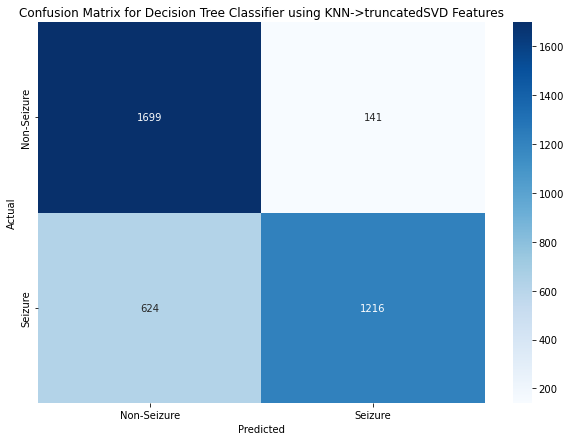

In [17]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier using KNN->truncatedSVD Features')
plt.show()

We varied the parameters and plotted the confusion matrix to evaluate whether our decision tree was able to make accurate predictions from the pipelined parameters. The test accuracy is lower and there are more False Negatives and False Positives in this confusion matrix than KNN by itself, indicating that further processing of the data yielded poorer results.

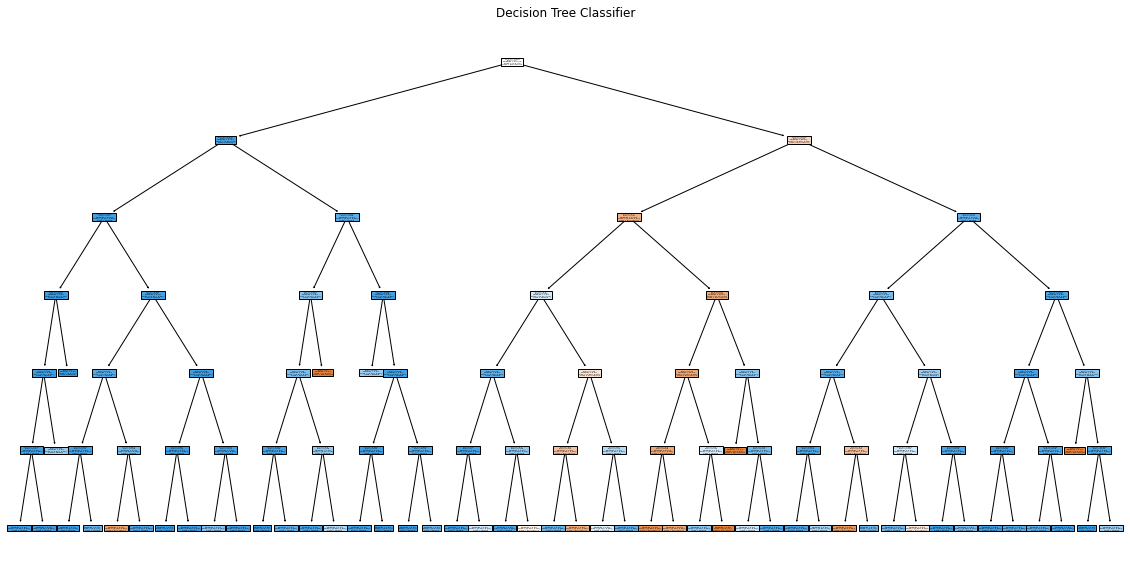

In [18]:
# plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['dt_clf'], filled=True, feature_names=trainingDF.columns.drop('y'), class_names=['Non-Seizure', 'Seizure'], proportion=True)
plt.title('Decision Tree Classifier')
plt.show()

The decision tree classifier diagram illustrates the chosen depths, splits and leaves that the model settled on. The intesity of Orange and Blue, show the classification purity of each node.

### Random Forest

In [19]:
rf_clf = RandomForestClassifier(max_depth=4)
rf_pipeline = Pipeline(steps=[
    ('rf_clf', rf_clf)
])

param_grid = {
    "rf_clf__n_estimators" : [100, 200, 300],
    "rf_clf__max_depth" : [4, 5, 6]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, verbose=4)
grid_search.fit(X_train_truncatedSVD, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_truncatedSVD)

test_acc = best_model.score(X_test_truncatedSVD, y_test)

print(f"Test accuracy: {test_acc}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Params: {'rf_clf__max_depth': 6, 'rf_clf__n_estimators': 100}
Best Score: 0.8120923913043478
Test accuracy: 0.8021739130434783


After transforming the data to 14 dimensions with TruncatedSVD, we used Random Forest to make predictions for epileptic vs non epileptic data points, varying and selecting the best parameters. The testing accuracy is recorded below, with the best score being around 81.2% from training and 80.2% from testing. This accuracy is very similar to the decision tree, but is still lower than what we had calculated from KNN by itself earlier in the pipeline, once again suggesting that different parameters for data processing may be better.

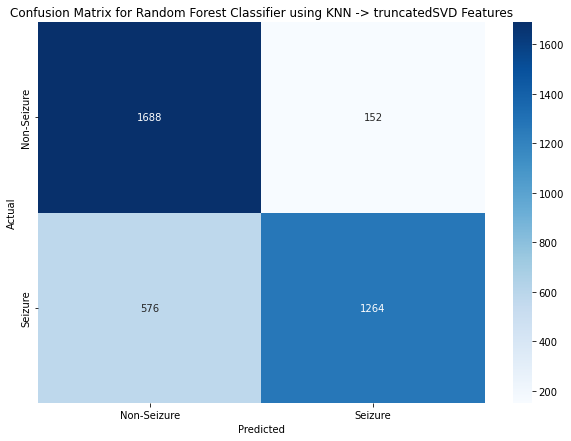

In [20]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier using KNN -> truncatedSVD Features')
plt.show()

We then plotted the confusion matrix to evaluate whether our random forest was able to make accurate predictions from the pipelined parameters, which was nearly identical to that of the decision tree, with fewer False Negatives, more False Postives, fewer True Negatives, with more False Positives and True Positives.

## Pipeline Interpretation

Unfortunately, the results from both maching learing models at the end of the pipeline were worse than after the initial stage of K-Nearest Neighbors. The accuracies being poorer reflects that at some stage the pipeline obscured relevant or useful features and reduced the effectiveness of the tree models to classify the seizure data. We can see an early breakdown where the TruncatedSVD features on the scree plot were very insignificant (the largest predicting less than 0.5% of the variance).

# Ablation Study: Pass X_t{rain, est} to either TruncatedSVD, KNN

To better understand where our pipeline went wrong we performed an ablation study on our pipeline's components and also introduced a new dimensionality reduction technique in t-SNE. This ablation study consisted of processing the raw training data with either K-Nearest Neighbors, TruncatedSVD, or t-SNE and feeding the output of each of these into both Decision Tree and Random Forest.

### Hyperpareters:

To do a comparative study, we control for hyperparameters across all uses of Decision Tree and Random Forest in this ablation study.
- We controlled for decision tree hyperpameters setting `max_depth=6`, `min_samples_split=5`, and `min_samples_leaf=5`
- We controlled for random forest hyperparameters setting `n_estimators=100`, and `max_depth=6`

![](https://cdn.discordapp.com/attachments/1224453640417312899/1248698416406462544/Screenshot_2024-06-07_at_11.01.38.png?ex=66649c86&is=66634b06&hm=522211ffd46e8160ebad88870aec421946305f389c40a51a84639da5e7bc60b1&)

## K-Nearest Neighbors on Raw Data
We start again with K-Nearest Neighbors on the Raw Data. For redundancy, we repeat the same visualizations as in the initial pipeline. We use KNN since our data isn't Guassian and isn't mostly linearly correlated, as evidence by the pair plots. Thus the non-parametic nature of KNN motivates us to apply thsi method for this data set. Sinec we cluster on local instances, similar instances can be clustered to create a bag of a class. While the value of K can regularize the strength of the clusters, we chose an odd and low number to avoid strong similarity assumptions. Since we didn't standardize the data (as outliers can be influence the clustering of KNN), for the sake of consitency we do not standardize the data here either, so that KNN can learn the non-parametric distribution, instead of a distribution that was made to be parametrized via standardization.

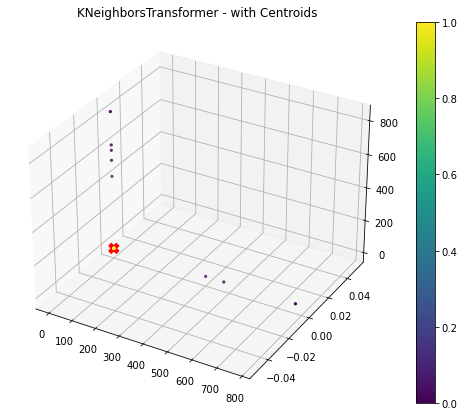

Number of centroids: 2
Centroid 1 Coord: [0. 0. 0. ... 0. 0. 0.]
Centroid 2 Coord: [0.1121913  0.         0.2073638  ... 2.72587858 0.82170996 2.62808926]
Centroid 1 Shape: (14720,)
Centroid 2 Shape: (14720,)


In [21]:
# KNN training (knn_transformer)
knn_transformer = KNeighborsTransformer(n_neighbors=5)
X_train_knn = knn_transformer.fit_transform(X_train, y_train).toarray() 
X_test_knn = knn_transformer.transform(X_test).toarray()

# K-Means clustering to find centroids
kmeans = KMeans(n_clusters=len(np.unique(y_train)), random_state=42)
kmeans.fit(X_train_knn)
centroids = kmeans.cluster_centers_


# Visualize KNN transformer with centroids
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_train_knn[:, 0], X_train_knn[:, 1], X_train_knn[:, 2], c=y_train, cmap='viridis', s=5)
centroid_sc = ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='X', s=100)

plt.title('KNeighborsTransformer - with Centroids')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')
plt.colorbar(sc)
plt.show()


# print number of centroids
num_centroids = len(centroids)
print(f'Number of centroids: {num_centroids}')

# print centroids
centroid_1 = centroids[0]
centroid_1_shape = centroid_1.shape
centroid_2 = centroids[1]
centroid_2_shape = centroid_2.shape
print(f'Centroid 1 Coord: {centroid_1}')
print(f'Centroid 2 Coord: {centroid_2}')
print(f'Centroid 1 Shape: {centroid_1_shape}')
print(f'Centroid 2 Shape: {centroid_2_shape}')

As with the pipeline, the centroids overlap and are centered at 0 in low dimensional space.

KNN Testing Accuracy: 0.8434782608695652


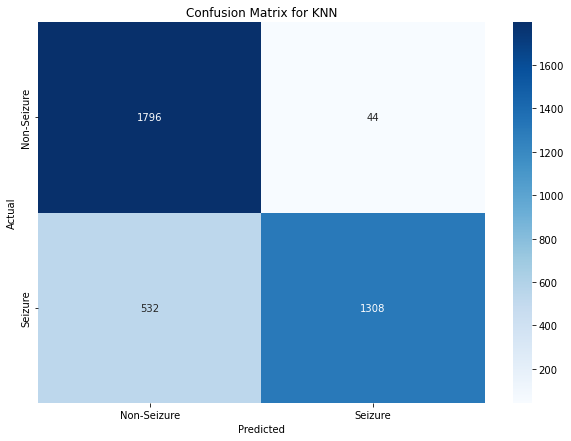

In [22]:
# KNN training (knn_classifier) and confusion matrix visualization

# train KNN classifier on transformed data
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_knn, y_train)
y_pred_knn = knn_classifier.predict(X_test_knn)

# calculate KNN accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f"KNN Testing Accuracy: {knn_accuracy}")

# calculate confusion matrix
knn_confusion_matrix = confusion_matrix(y_test, y_pred_knn)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(knn_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

Our KNN Accuracy was around 84% (as it was in the pipeline) and the confusion matrix shows similar values.

## Decision Tree and Random Forest on K-Nearest Neighbors Processed Data

For the ablation study we ran both of the tree algorithms directly on the KNN output to better understand how the machine learning models interacted with the KNN data.

### Decision Tree

Since Decision Trees are prone to overfitting we had ot regularize it wit some pruning, max depth, internal node split count, and maximum leaf samples. Since Decision trees split according to a least-uncertainty metric, the features near the root are more important than the deeper levels. Since the uncertainty metric is used, the Decision tree is insensitive to the data distribution and outliers.  Also, Tree-based models are shown to perform better than deep learning models on tabular data (Grinsztajn 2022).

In [23]:
# DecisionTree code
# train DecisionTreeClassifier
dt_clf = DecisionTreeClassifier();


dt_pipeline = Pipeline(steps=[
    ('dt_clf', dt_clf)
]);

param_grid = {
    "dt_clf__max_depth" : [6],
    "dt_clf__min_samples_split" : [5],
    "dt_clf__min_samples_leaf" : [5]
}

grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, n_jobs=4, verbose=4);
grid_search.fit(X_train_knn, y_train);

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

best_model = grid_search.best_estimator_;

y_pred = best_model.predict(X_test_knn);

test_acc = best_model.score(X_test_knn, y_test)
print(f"Test accuracy: {test_acc}")

[CV 5/5] END dt_clf__max_depth=4, dt_clf__min_samples_leaf=1, dt_clf__min_samples_split=2;, score=0.806 total time=   0.0s
[CV 3/5] END dt_clf__max_depth=4, dt_clf__min_samples_leaf=2, dt_clf__min_samples_split=2;, score=0.803 total time=   0.0s
[CV 5/5] END dt_clf__max_depth=4, dt_clf__min_samples_leaf=2, dt_clf__min_samples_split=5;, score=0.807 total time=   0.0s
[CV 3/5] END dt_clf__max_depth=4, dt_clf__min_samples_leaf=5, dt_clf__min_samples_split=2;, score=0.803 total time=   0.0s
[CV 1/5] END dt_clf__max_depth=4, dt_clf__min_samples_leaf=5, dt_clf__min_samples_split=10;, score=0.774 total time=   0.0s
[CV 4/5] END dt_clf__max_depth=5, dt_clf__min_samples_leaf=1, dt_clf__min_samples_split=2;, score=0.810 total time=   0.1s
[CV 5/5] END dt_clf__max_depth=5, dt_clf__min_samples_leaf=1, dt_clf__min_samples_split=2;, score=0.812 total time=   0.1s
[CV 5/5] END dt_clf__max_depth=5, dt_clf__min_samples_leaf=2, dt_clf__min_samples_split=2;, score=0.806 total time=   0.1s
[CV 1/5] END dt

We run decision tree directly on the K-Nearest Neighbors transformer's output adjacency matrix. This yields an accuracy of ~52.8% for prediction (after training on 80% of data) and a test accuracy of ~53.4% when running the test data for prediction. Since the model does perform better than random chance, it is able to make predictions, albeit not highly accurate ones.  

Since the training error was very high and the test accuracy was also low, this suggests the model is underfitting in the bias-variance trade-off to classify seizure vs non-seizure data, exhibiting a high bias and low model complexity from the adjacency matrix of distances.

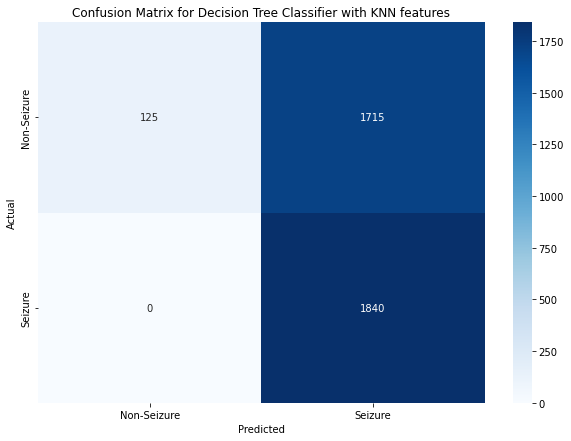

In [24]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier with KNN features')
plt.show()

To characterize the accuracy of the classifier, we used a Confusion Matrix, where the ideal matrix would have dark blue on the main diagonal (showing the prediction and actual labels matched) with perfectly white off-diagonals (no false positives and no false negatives). Here, we don’t observe this ideal case: we see a low True Negative and a perfectly low False Negative rate with a high True Positive and False Positive Rate. 

The perfectly low false negative rate is very interesting, and draws parallels to a bloom filter which we explore further in our discussion.

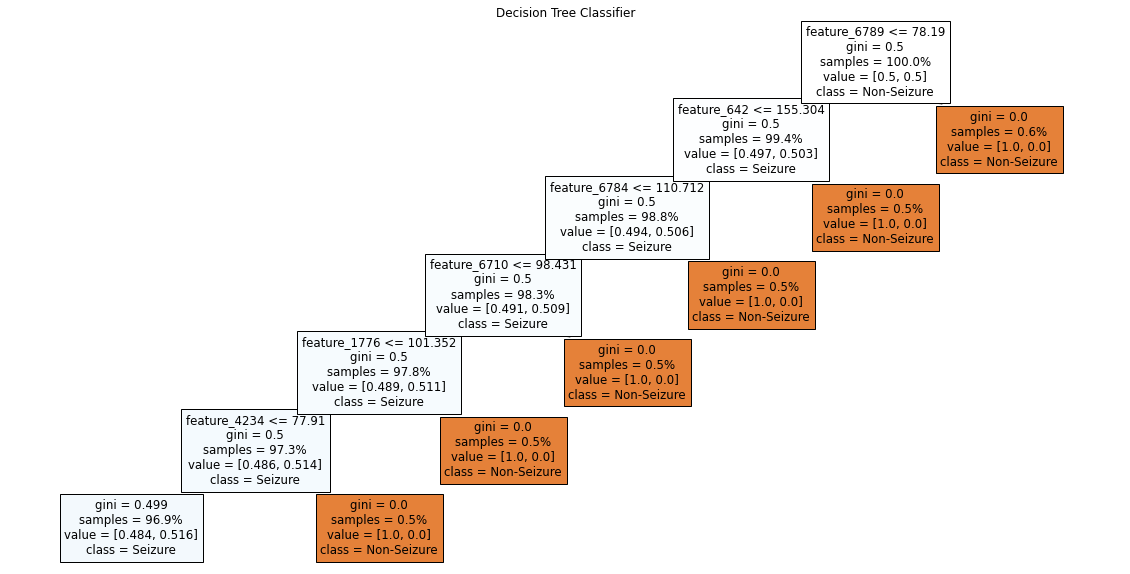

In [25]:
# plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['dt_clf'], filled=True, feature_names=[f'feature_{i}' for i in range(X_train_knn.shape[1])], class_names=['Non-Seizure', 'Seizure'], proportion=True)
plt.title('Decision Tree Classifier')
plt.show()

We also see how the decision tree performed the data split in the diagram below the confusion matrix. The output shows that in one split non-seizure data is easily classified as a pure and the depth of 6 makes the rest of the nodes redundant. But this classiier struggles to partition  the left subtree form the KNN trasformed features into pure blue nodes.

### Random Forest

Since it is an ensemble model that uses bootstrapped random subsampling to reduce overfitting and create robustness with pruning and various tree regularization (depth, samples per leaf, sample to split a node) and using random features. The ensemble nature allows prediction-averaging across diverse trees and data subsets, with voting to reduce exponential loss. Also, Tree-based models are shown to perfom better than deep learning models on tabular data (Grinsztajn 2022).

In [26]:
rf_clf = RandomForestClassifier(max_depth=4)
rf_pipeline = Pipeline(steps=[
    ('rf_clf', rf_clf)
])

param_grid = {
    "rf_clf__n_estimators" : [100],
    "rf_clf__max_depth" : [6]
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=4, verbose=4)
grid_search.fit(X_train_knn, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_knn)

test_acc = best_model.score(X_test_knn, y_test)

print(f"Test accuracy: {test_acc}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Params: {'rf_clf__max_depth': 6, 'rf_clf__n_estimators': 100}
Best Score: 0.7409646739130435
Test accuracy: 0.758695652173913


The accuracy was ~74.1% for prediction against the y_test (after training on 80% of data) and a test accuracy of ~75.9%. These accuracies are much higher than the Decision Tree in both cases.
Since the training error was slightly low - but still high - and the test accuracy was similar with less error, this suggests the model is not perfectly fit and could be slightly underfit for the bias-variance trade-off to classify seizure vs non-seizure data.

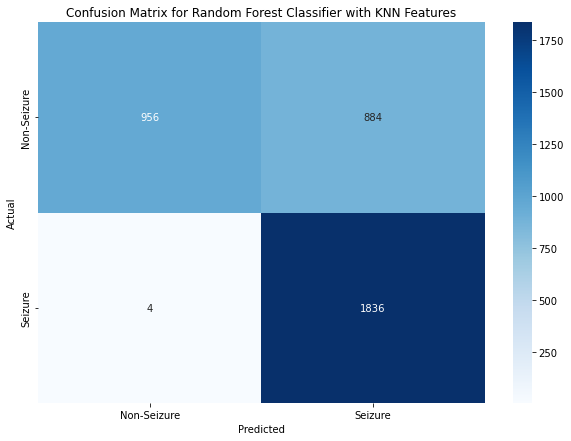

In [27]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier with KNN Features')
plt.show()

To characterize the accuracy of the classifier, we used a Confusion Matrix, where the ideal matrix would have dark blue on the main diagonal (showing the prediction and actual labels matched) with perfectly white off-diagonals (no false positives and no false negatives). We don’t observe this ideal case, as we observe a near-perfect low False Negative rate, but a moderate False Postive and slightly higher True Negative Rate, with a high True Positive rate.

## TruncatedSVD on Raw Data
We used TruncatedSVD because most of the data was near 0. Since PCA uses a Gaussian assumption, to have a more robust PCA we must go beyond the dense Gaussian assumption and use this method that can model sparseness, without having to de-mean the data. The main motivation of using this technique is for dimensionality reduction to get a fewer set of features that can classify the data by maximizing the disance between points for spearation. To do so, we enforced 14 features for TruncatedSVD to reduce the original 178-feature data. 

/tmp/ipykernel_116/1981716251.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('coolwarm', 10))


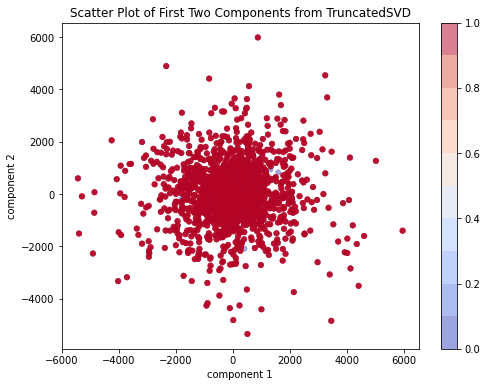

In [50]:
num_truncatedSVD_comps = 14
truncatedSVD = TruncatedSVD(n_components=num_truncatedSVD_comps, tol=0.01, random_state = 0)
X_train_truncatedSVD = truncatedSVD.fit_transform(X_train)
X_test_truncatedSVD = truncatedSVD.transform(X_test)

# Plot the first two truncatedSVD components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_truncatedSVD[:, 0], X_train_truncatedSVD[:, 1], c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('coolwarm', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('Scatter Plot of First Two Components from TruncatedSVD')
plt.colorbar()
plt.show()

After transforming the data and reducting it to 14 dimensions, we visualize the 14-dimensional space in a 2-D subspace to get a shadow of the how the data were clustered in the high-dimensional space. Compared to the scatter plot from TruncatedSVD on the KNN data in the initial pipeline, this one demonstrates larger variance along more than just the two axis. And given the low d view of the high diminsional data, we notice that these axes are insufficient to show a clear spereation among the data clusters. This plot may benefit from a 3 dimensional scatter plot - but unlikley due to the following Scree Plot.

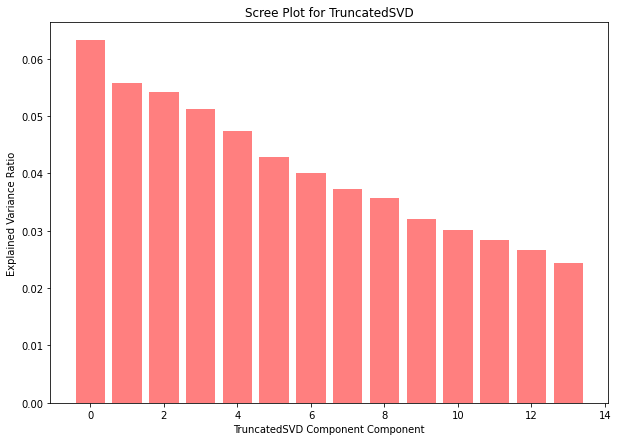

In [51]:
#Plot scree plot
indices = np.arange(len(truncatedSVD.explained_variance_ratio_))

plt.figure(figsize=(10, 7))
plt.bar(indices, truncatedSVD.explained_variance_ratio_, color='r', alpha=0.5)

plt.xlabel('TruncatedSVD Component Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for TruncatedSVD')

plt.show()

Since we see that the first two major dimensions don’t provide a clear low-dimensional interpretation of the data clustering, we perform a scree plot analysis to understand how much of each new reduced-dimension captures the data distribution in 14-dimensional space. We notice that the first Principal Component explains 6% of the variance in the data. Although this is an order of magnitude better than the Scree Plot for TruncatedSVD for all components, after applying a k-Nearest-Neighbor transformation ot the data, it is evident that the high-dimensional data distribution was not successfully captured by TruncatedSVD as there was no elbow in the Scree Plot, but a linear drop-off in the variance explained by each component after. 

In [53]:
# https://stats.stackexchange.com/questions/130721/what-norm-of-the-reconstruction-error-is-minimized-by-the-low-rank-approximation
# https://stats.stackexchange.com/questions/211686/why-does-the-reconstruction-error-of-truncated-svd-equal-the-sum-of-squared-sing
#Fronebius norm of discarded Sigular values
X_train_reconstructed = truncatedSVD.inverse_transform(X_train_truncatedSVD)
reconstruction_error = np.linalg.norm(X_train - X_train_reconstructed, 'fro')
print("Reconstruction error: ", reconstruction_error)

Reconstruction error:  262650.7327118373


Additionally, we also notice that the reconstruction error found, by the Frobenius Norm of the Singular Value Matrix, is also particularly high (in the order of $10^{5}$, the same as the initial KNN + TruncatedSVD) but is a little under 1.6x smaller.

## Decision Tree and Random Forest on TruncatedSVD Processed Data

This TruncatedSVD output from raw data as an input differs significantly from when KNN data was used as the input so we expect different results when running both tree models on the TruncatedSVD features.

### Decision Tree

In [31]:
# DecisionTree code
dt_clf = DecisionTreeClassifier()


dt_pipeline = Pipeline(steps=[
    ('dt_clf', dt_clf)
])

param_grid = {
    "dt_clf__max_depth" : [6],
    "dt_clf__min_samples_split" : [5],
    "dt_clf__min_samples_leaf" : [5]
}

grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, n_jobs=4, verbose=4)
grid_search.fit(X_train_truncatedSVD, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_truncatedSVD)

test_acc = best_model.score(X_test_truncatedSVD, y_test)
print(f"Test accuracy: {test_acc}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Params: {'dt_clf__max_depth': 6, 'dt_clf__min_samples_leaf': 5, 'dt_clf__min_samples_split': 5}
Best Score: 0.9147418478260869
Test accuracy: 0.9154891304347826


For decision tree on TruncatedSVD data, we receive our most accurate results so far. This outputs an accuracy of ~91.5% for prediction (after training on 80% of data) and a test accuracy of 91.5%.

Since the training error was low (with a high accuracy) and the test accuracy was also low, this suggests the model is in the sweet spot for the bias-variance trade-off to classify seizure vs non-seizure data.

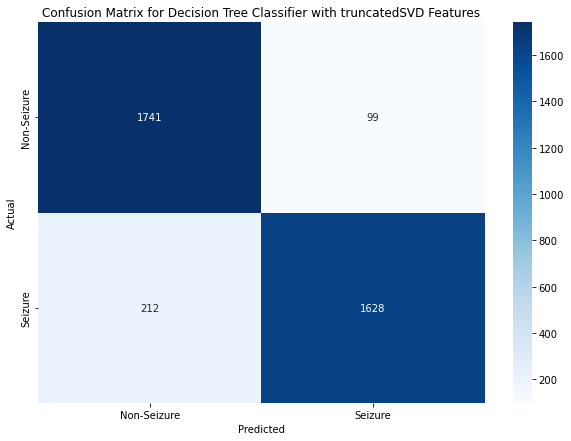

In [32]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier with truncatedSVD Features')
plt.show()

To characterize the accuracy of the classifier, we used a Confusion Matrix, where the ideal matrix would have dark blue on the main diagonal (showing the prediction and actual labels matched) with perfectly white off-diagonals (no false positives and no false negatives). This confusion matrix is not ideal but has low false negatives and even lower false positives.

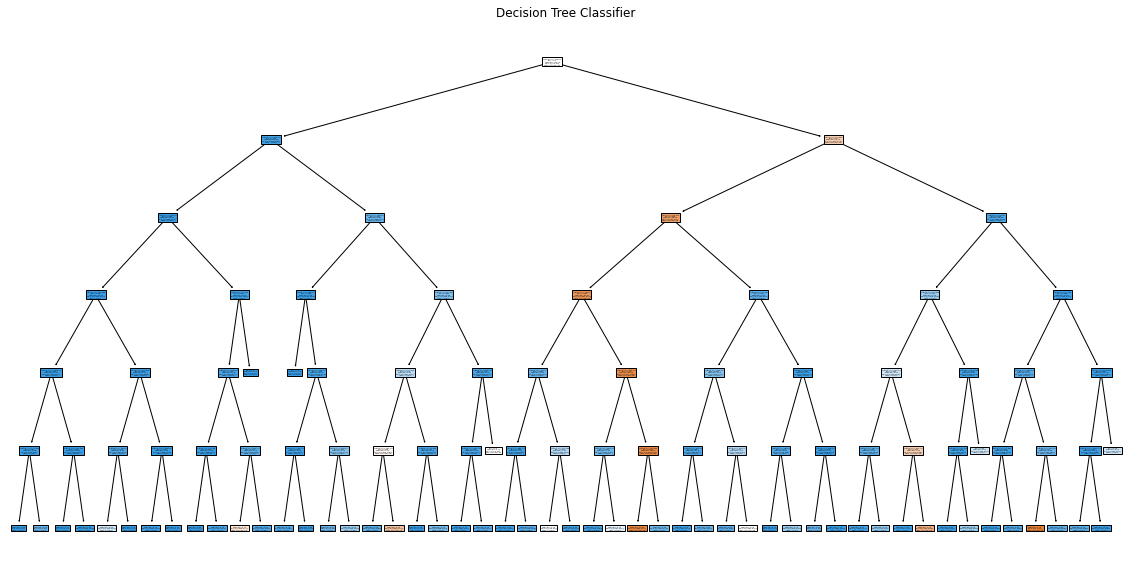

In [33]:
# plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['dt_clf'], filled=True, feature_names=[f'feature_{i}' for i in range(X_train_truncatedSVD.shape[1])], class_names=['Non-Seizure', 'Seizure'], proportion=True)
plt.title('Decision Tree Classifier')
plt.show()

The classifier for this decision tree resembles a tree (unlike with KNN as an input) showing that this data was far more useful for the algorithm by being able to clasify the putity of nodes as orange (non-Seizure Class), but also into blue (Seizure Class)

### Random Forest

In [34]:
rf_clf = RandomForestClassifier(max_depth=4);
rf_pipeline = Pipeline(steps=[
    ('rf_clf', rf_clf)
]);

param_grid = {
    "rf_clf__n_estimators" : [100],
    "rf_clf__max_depth" : [6]
};

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, verbose=4);
grid_search.fit(X_train_truncatedSVD, y_train);

best_params = grid_search.best_params_;
best_score = grid_search.best_score_;

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

best_model = grid_search.best_estimator_;

y_pred = best_model.predict(X_test_truncatedSVD);

test_acc = best_model.score(X_test_truncatedSVD, y_test);

print(f"Test accuracy: {test_acc}")

[CV 3/5] END dt_clf__max_depth=6, dt_clf__min_samples_leaf=5, dt_clf__min_samples_split=5;, score=0.527 total time=  12.5s
[CV 2/5] END rf_clf__max_depth=6, rf_clf__n_estimators=100;, score=0.746 total time=  15.1s
[CV 3/5] END dt_clf__max_depth=6, dt_clf__min_samples_leaf=5, dt_clf__min_samples_split=5;, score=0.916 total time=   0.1s
[CV 4/5] END dt_clf__max_depth=6, dt_clf__min_samples_leaf=5, dt_clf__min_samples_split=5;, score=0.527 total time=  11.9s
[CV 5/5] END dt_clf__max_depth=6, dt_clf__min_samples_leaf=5, dt_clf__min_samples_split=5;, score=0.531 total time=  10.2s
[CV 4/5] END rf_clf__max_depth=6, rf_clf__n_estimators=100;, score=0.737 total time=  10.9s
[CV 5/5] END rf_clf__max_depth=6, rf_clf__n_estimators=100;, score=0.738 total time=  11.6s
[CV 4/5] END dt_clf__max_depth=6, dt_clf__min_samples_leaf=5, dt_clf__min_samples_split=5;, score=0.898 total time=   0.1s
[CV 2/5] END dt_clf__max_depth=6, dt_clf__min_samples_leaf=5, dt_clf__min_samples_split=5;, score=0.530 total

Random Forest on TruncatedSVD outputted data yields even more accurate results than the previous decision tree. This outputs an accuracy of ~95.8% for prediction (after training on 80% of data) and a test accuracy of 94.9%.

Since the training error was low (with a high accuracy) and the test accuracy was also low, this suggests the model is in the sweet spot for the bias-variance trade-off to classify seizure vs non-seizure data.

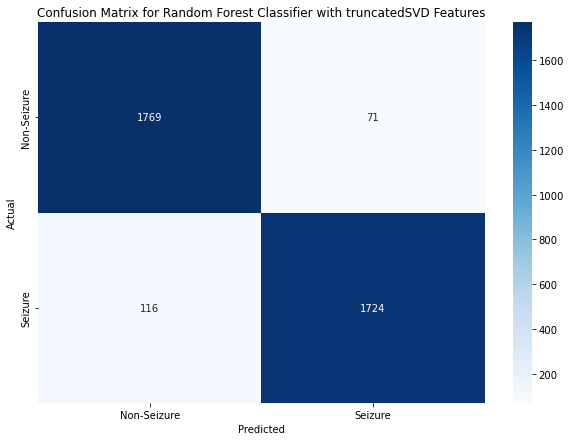

In [35]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure']);
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier with truncatedSVD Features')
plt.show()

This confusion matrix resembles the decision tree matrix, but has fewer False Negatives and False Positives, reflecting its higher accuracy. Interestingly, the ratio of False Negatives to False Positives mirrors the 3:2 ratio seen from decision tree, just with smaller numbers.

# Additional Study

![](https://media.discordapp.net/attachments/1224453640417312899/1248698447167492187/Screenshot_2024-06-07_at_11.01.45.png?ex=66649c8d&is=66634b0d&hm=a20b5c991175ebd1d8824e0f693aac09b88baccac5f6e44107535733bb43544b&=&format=webp&quality=lossless&width=1057&height=418)

## t-SNE on Raw Data

Since the data was linearly correlated, the assumption of linear uncorrelation of PCA is violated (which by proxy also violates assumptions of TruncatedSVD). To enforce dimensionality reduction and deal with sparse non-linear data that may not be Gaussian distributed, we make use of t-SNE. Since the data is innately temporally correlated (EEG measurements closer in time being more correlated) and the interspike intervals depend on the local structure of the temporal locality of the EEG spiking events, t-SNE also helps enforce local structure in the dimension-reduced space, rather than forcing large distance between time points, as PCA (and by proxy, TruncatedSVD) does.

In [36]:
from sklearn.manifold import TSNE

X = np.concatenate((X_train, X_test), axis=0);
tsne = TSNE(n_components=2, random_state=0);
X_tsne = tsne.fit_transform(X);

X_train_tsne = X_tsne[:len(X_train)]
X_test_tsne = X_tsne[len(X_train):]

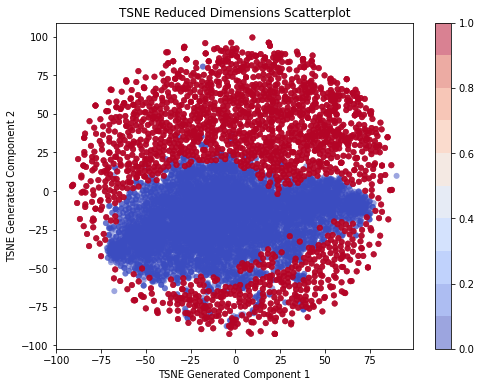

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('coolwarm', 10));
plt.title('TSNE Reduced Dimensions Scatterplot')
plt.xlabel('TSNE Generated Component 1')
plt.ylabel('TSNE Generated Component 2')
plt.colorbar()
plt.show()

After transforming the data and reducing it to 2 dimensions, we visualise the 178-dimensional space in a 2-D subspace to get a shadow of how the data is in high-dimensional space. Here we observe more apparent clustering behavior with the non-seizure class being more closely clustered than the seizure class (red).

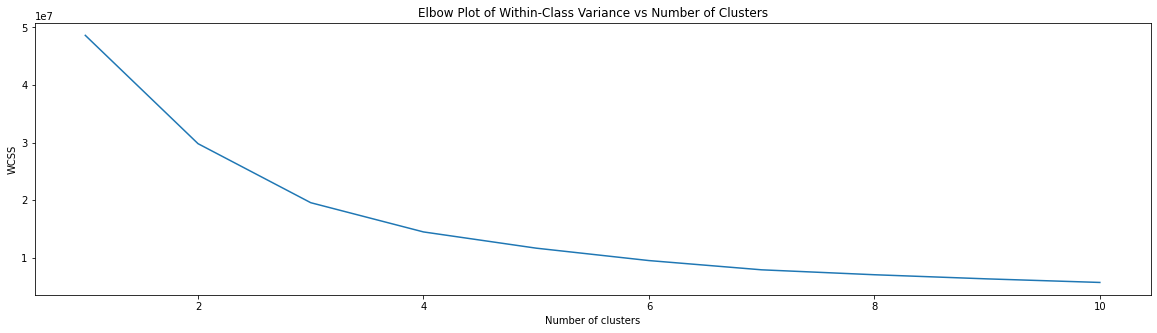

array([48606984. , 29811968. , 19568290. , 14496968. , 11679811. ,
        9527988. ,  7923192.5,  7068901.5,  6350967.5,  5731394.5])

In [38]:
import os
import sys

sys.stderr = open(os.devnull, 'w')

wcss = [] #in-clsuter sum of squares for i clusters (how tightly data is near cluster center)
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0);
    kmeans.fit(X_train_tsne);
    wcss.append(kmeans.inertia_);

elbowPlot,ax = plt.subplots(figsize=(20,5))
elbowPlot = plt.plot(range(1, max_clusters+1), wcss)
plt.title('Elbow Plot of Within-Class Variance vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
np.array(wcss)

We perform an Elbow Plot analysis to understand how tightly bounded the data are around the clusters are in t-SNE space as the number of t-SNE clusters increases. Although we expected the within-cluster variance to decrease as the number of clusters increases, we look for when the change in this value (`wcss`) changes less drastically. This occurs around 3 classes. This might be due to an extra cluster being created for boundary-case data points that are hard to confidently cluster. But since we would like to enforce two dimensions we use t-SNE to reduce our data to 2 dimensions.

## Decision Tree and Random Forest on t-SNE Processed Data

### Decision Tree

In [39]:
# Decision Tree
dt_clf = DecisionTreeClassifier();
# dt_clf.fit(X_train_tsne, y_train)
# y_pred_dt = dt_clf.predict(X_test_tsne)
# print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")


dt_pipeline = Pipeline(steps=[
    ('dt_clf', dt_clf)
]);

param_grid = {
    "dt_clf__max_depth" : [6],
    "dt_clf__min_samples_split" : [5],
    "dt_clf__min_samples_leaf" : [5]
}

grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, n_jobs=-1, verbose=4);
grid_search.fit(X_train_tsne, y_train);

best_params = grid_search.best_params_;
best_score = grid_search.best_score_;

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_tsne);

test_acc = best_model.score(X_test_tsne, y_test)
print(f"Test accuracy: {test_acc}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Params: {'dt_clf__max_depth': 6, 'dt_clf__min_samples_leaf': 5, 'dt_clf__min_samples_split': 5}
Best Score: 0.9247282608695653
Test accuracy: 0.9415760869565217


For decision tree on t-SNE data, we receive outputs of ~92.5% for prediction (after training on 80% of data) and a test accuracy of ~94.2%. These are the highest prediction and test accuracies measured so far for decision tree, suggesting that the t-SNE configuration we used meshed the best with the decision tree.

Since the training error was low (with a high accuracy) and the test accuracy was also low, this suggests the model is in the sweet spot for the bias-variance trade-off to classify seizure vs non-seizure data.

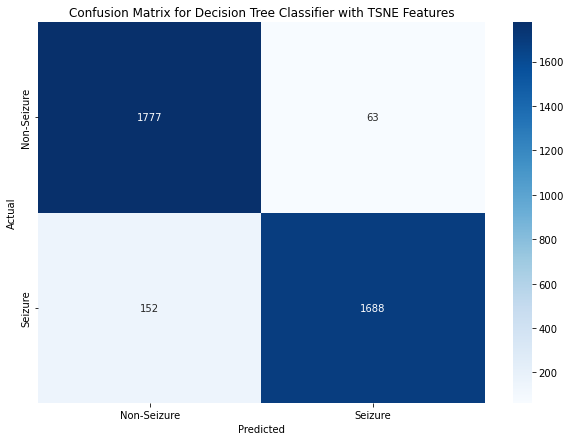

In [40]:
# calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier with TSNE Features')
plt.show()

The confusion matrix shows similar results to previous confusion matrices using `TruncatedSVD` → `Tree Models`, with the same of False-Negatives to False-Positives ratio of 2:1. 

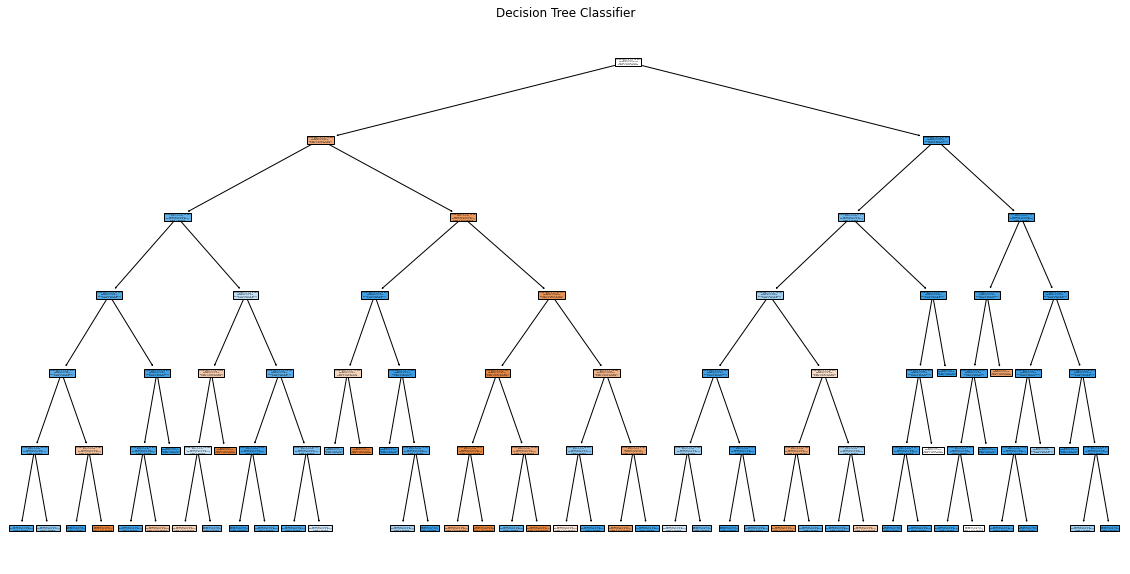

In [41]:
# plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_model.named_steps['dt_clf'], filled=True, feature_names=['component 1', 'component 2'], class_names=['Non-Seizure', 'Seizure'], proportion=True)
plt.title('Decision Tree Classifier')
plt.show()

This decision tree looks similar to that from the previous parts that are able to adequately reach more purity for the Seizure Class (blue),

### Random Forest

In [42]:
# Random Forest
rf_clf = RandomForestClassifier()
param_grid = {
    "n_estimators" : [100],
    "max_depth" : [6]
}
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, n_jobs=-1, verbose=4)
grid_search.fit(X_train_tsne, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Params: {best_params}")
print(f"Best Score: {best_score}")

best_model = grid_search.best_estimator_
test_acc = best_model.score(X_test_tsne, y_test)

print(f"Test accuracy: {test_acc}")


y_pred = best_model.predict(X_test_tsne);

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Params: {'max_depth': 6, 'n_estimators': 100}
Best Score: 0.9366168478260869
Test accuracy: 0.9510869565217391


For Random Forest on t-SNE data, we receive outputs of ~93.7% for prediction (after training on 80% of data) and a test accuracy of ~95.1%. This accuracy is higher than decision tree for t-SNE, but is lower than the prediction accuracy observed when TruncatedSVD's features were inputed to Random Forest, but t-SNE was higher in the test accuracy.

Since the training error was low (with a high accuracy) and the test accuracy was also low, this suggests the model is in the sweet spot for the bias-variance trade-off to classify seizure vs non-seizure data.

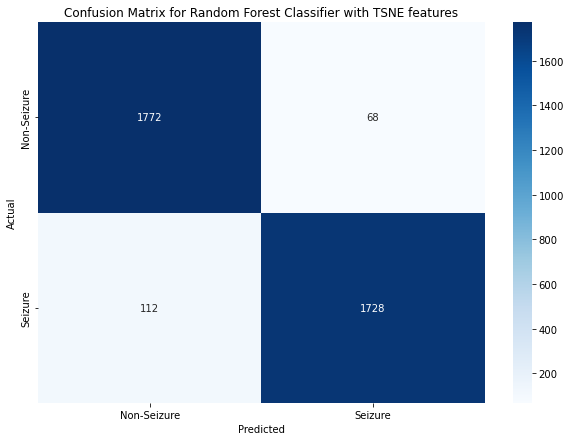

In [43]:
# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Print the confusion matrix using seaborn's heatmap function
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier with TSNE features')
plt.show()

This confusion matrix shows the accuracy with dark upper left and lower right corners. This matrix also breaks the pattern seen for TruncatedSVD Decision Tree and Random Forest and t-SNE Decision Tree, with a ratio of False Negative to False Positive around 3:2.

# Conclusion & Discussion



<h2>Accuracy Comparison Table</h2>

<h3>Initial Model:</h3>
<table>
<tr><th>Model</th><th>Cross Validation Accuracy</th><th>Test Accuracy</th></tr>
<tr><td>KNN</td><td style="color:green">84.3%</td><td>-</td></tr>
<tr><td>KNN->TruncatedSVD->DecisionTree</td><td style="color:green">80.0%</td><td style="color:orange">79.2%</td></tr>
<tr><td>KNN->TruncatedSVD->Random Forest</td><td style="color:green">81.2%</td><td style="color:green">80.2%</td></tr>
</table>

<h3>Ablation Study:</h3>
<table>
<tr><th>Model</th><th>Cross Validation Accuracy</th><th>Test Accuracy</th></tr>
<tr><td>KNN</td><td style="color:green">84.3%</td><td>-</td></tr>
<tr><td>KNN->DecisionTree</td><td style="color:red">52.8%</td><td style="color:red">53.4%</td></tr>
<tr><td>KNN->Random Forest</td><td style="color:orange">74.1%</td><td style="color:orange">75.9%</td></tr>
<tr><td>TruncatedSVD->DecisionTree</td><td style="color:blue">91.5%</td><td style="color:blue">91.5%</td></tr>
<tr><td>TruncatedSVD->Random Forest</td><td style="color:purple">95.8%</td><td style="color:purple">94.9%</td></tr>
</table>

<h3>Additional Exploration:</h3>
<table>
<tr><th>Model</th><th>Cross Validation Accuracy</th><th>Test Accuracy</th></tr>
<tr><td>t-SNE->DecisionTree</td><td style="color:blue">92.5%</td><td style="color:blue">94.2%</td></tr>
<tr><td>t-SNE->Random Forest</td><td style="color:blue">93.7%</td><td style="color:purple">95.1%</td></tr>
</table>

## Discussion

The original pipeline we wanted to test (from the paper) consisted of K-Nearest Neighbors data fed into PCA (which we replaced with TruncatedSVD) to isolate features, and that data fed into tree models. However, from the ablation study that followed, we found that using TruncatedSVD or TSNE on the raw data and feeding it directly to our tree models gave better results than when we used K-Nearest Neighbors in the pipeline. 

We can hypothesize several limitations to the KNN transformer we used throughout this project. For one, the KNN transformer we used outputted an adjacency matrix, as opposed to low-dimensional  transformation of the data which likely made it difficult for the tree models and truncatedSVD to interpret the data and output good results.

One interesting observation from the ablation study that could lead to further investigation was an apparent similarity between using K-Nearest Neighbors features for the decision tree or random forest method and a bloom filter. There were 0 and 4 False Negatives reported for each of the algorithms, while the test accuracies remained abysmal at 53% and 74%, respectively. Perhaps using more neighbors would increase the amount of ‘bits’ in the figurative bloom filter, reducing the amount of false positives that led to these low accuracies. Other directions of further study is to consider how using the inter-spike intervals instead of the raw EEG signals might affect our categorial prediction and to analyze the features of the decision tree to see which features were most important to split the nodes. Since EEG is innately time-series data, we hope to conduct forecasting using deep learning models, such as Recurrent Neural Networks, in order to facilitate patient monitoring as well as categorical prediction.

Some other limitations of our study includes needing more testing to ensure higher accuracies for seizure classification for a medical device application and the inability to reproduce results from Harikumar, R., & Vijayakumar, T. (2013) and Alalayah et al. (2023), due the lack of hyperparameters specified in their reports. Our hypothesis focused on accuracy as one metric to compare different models, but a stastical measure like a paired t-test or ANOVA with several runs of non-seeded model instances, or AUC-ROC values with a Diagnostic metric like F-score along with the Confusion Matrices, could be used to compare model performance. Another limitation of study was the availability of EEG data online. In the search for data to implement the pipeline, our team wanted to prioritize a large sample size. Although EEG measures signals in the order of milliVolts, we notice that our dataset had not explicitly specified the units measured for the value of data features and decided to not create this implication in our interpretation of the data.  Unfortunately, most publicly available EEG datasets have sample sizes from 5-20 subjects, with the current UCI dataset being the only data set we found that had a suitable number (data from 500 people). We could further justify our EDA and data visualizations with stastical measures like Kurtosis for checking distribution normality, skew metrics, or pearson correlations or covariance matrices for measuring the degree to which dimeinsiality reduction mighe be applicable. 

This dataset was very convenient, but it also limited our ability to connect results from our study to brain regions and specific brain activity due to the nature of EEG data being measured at the scalp and not providing voxelized data like fMRI. Given the preprocessed EEG data, we only knew the class of the data, and the features for each datapoint were the EEG data sampled every $\frac{1}{178}^{\text{th}}$ of a second for one second. The data allowed us to predict seizures with high effectiveness but did not allow us to connect them to brain regions.

If we had fMRI data that maps EEG features to specific brain region voxels, we would like to isolate the most significant features to predict seizures and map the brain regions in a heat map, revealing which part of the brain is important to monitor for people with epilepsy via a statistical deocding analysis.

## Conclusion

The data visualizations indicate that pediatric patients with epilepsy during a seizure have temporal EEG patterns with significantly higher variance than non-epileptic patients. From the model accuracies, our data supports the claim that dimensionality reduction techniques t-SNE and TruncatedSVD resulted in more accurate epileptic seizure classifications using both Decision Tree and Random Forest. We also observed that for models that had better accuracy, they also did a better job minimizing the False Positives and False Negatives. This is critical for seizure detection as a higher False Positive Rate could overwhelm and make ineffecient use of medical resources, while a higher False Negative could lead to potentially deleterious outcomes for people with epilepsy.

Another important conclusion from these results is that Random Forest generally performed with a higher accuracy across all processing methods. Its regularization and ensemble model combined with expressive decision boundary carving led to higher accuracies than the Decision Tree for every single data processing model. 

Our results from this study support both parts of our hypothesis. From this table, we can see that the training accuracy for TruncatedSVD fed into Random Forest was 95.8%, the highest accuracy across all data processing pipelines discussed in the project. However, the testing accuracy was 94.9%, second only to the 95.1% testing accuracy t-SNE data fed into Random Forest. 

From the distribution of accuracies, we also conclude that our K-Nearest Neighbors model output was difficult to parse, and the chosen number of 5 neighbors may have been too few.

From our data visualization table titled “ISI Distribution for Seizure vs Non-Seizure”, we found out that the spiking density of the Seizure class to be higher than the non-Seizure class, which matches our hypothesis since seizures are known to cause involuntary neuron activation that can trigger other neurons.